In [1]:
import pandas as pd
df = pd.read_excel('close.xlsx',sheet_name='data')
df.head()

FileNotFoundError: ignored

In [2]:
df.shape

NameError: ignored

In [3]:
df2 = df[df['country']=='US']

NameError: ignored

In [ ]:
df2['country'].value_counts()

In [ ]:
df3 = df[df['country']=='IN']
df3['country'].value_counts()

In [ ]:
data = pd.concat([df2, df3],ignore_index=True) 

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
data.to_csv('ss.csv') 

In [ ]:
df = pd.read_csv('ss.csv')
df.head()
df.shape

In [ ]:
df['score'] = 0
df.head()

In [ ]:
import numpy as np

In [ ]:
for i in range(len(df)):
  # packet 1
  p = df['Q14'][i]
  q = df['Q2'][i]
  r = df['Q22'][i]
  r = 5-r
  a = [p,q,r]
  s = np.std(a)
  df['score'][i] = 5*(2-s)

In [ ]:
df.head(20)
df['score'].value_counts()

 7     12483
 5      9580
 3      3287
 2      1210
 1      1103
 10      806
 0       489
-1       296
Name: score, dtype: int64

In [ ]:
# buckets - 
'''
Q  28,32
Q  24,30
Q  27,25
Q  10,18
Q  26,20,16
Q  14,2,     X 22

'''

In [ ]:
# example - scoring scheme
p = 5
q = 1
a = [p,q]
s = np.std(a)
print(s)

# for 3 = 5*(2-s)
# 0, 0.47, 0.81, 0.94, ..., 1.88
# 10, 7.65, 5.95, ....., 0.6

# for 2 = 5*(2-s)
# 0, 0.5, 1, 1.5, 2

2.0


In [ ]:
# scoring scheme
for i in range(len(df)):
  # Packet 2
  p1 = df['Q28'][i]
  q1 = df['Q32'][i]
  a1 = [p1,q1]
  s1 = np.std(a1)
  df['score'][i] = df['score'][i] + (5*(2-s1))

In [ ]:
for i in range(len(df)):
  # Packet 3
  p1 = df['Q24'][i]
  q1 = df['Q30'][i]
  a1 = [p1,q1]
  s1 = np.std(a1)
  df['score'][i] = df['score'][i] + (5*(2-s1))

In [ ]:
for i in range(len(df)):
  # Packet 4
  p1 = df['Q25'][i]
  q1 = df['Q27'][i]
  a1 = [p1,q1]
  s1 = np.std(a1)
  df['score'][i] = df['score'][i] + (5*(2-s1))

In [ ]:
for i in range(len(df)):
  # Packet 5
  p1 = df['Q10'][i]
  q1 = df['Q18'][i]
  a1 = [p1,q1]
  s1 = np.std(a1)
  df['score'][i] = df['score'][i] + (5*(2-s1))

In [ ]:
for i in range(len(df)):
  # Packet 6
  p1 = df['Q26'][i]
  q1 = df['Q20'][i]
  r1 = df['Q16'][i]
  a1 = [p1,q1,r1]
  s1 = np.std(a1)
  df['score'][i] = df['score'][i] + (5*(2-s1))

In [ ]:
df['score'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

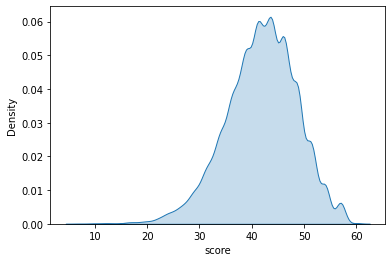

In [ ]:
sns.kdeplot(data=df['score'], shade=True)

In [ ]:
cnt = 0

for i in range(len(df)):
  if df['score'][i] < 30 :
    cnt = cnt + 1

print(cnt)

1287


In [ ]:
n1 = df[df['score']>30]

In [ ]:
n1.shape

(27681, 41)

In [ ]:
n1['score'].unique()

array([50, 44, 46, 43, 36, 40, 34, 48, 33, 35, 45, 39, 51, 41, 47, 54, 37,
       49, 31, 32, 42, 38, 52, 57, 53, 55, 60])

In [ ]:
n1.to_csv('N1.csv') 

In [ ]:
n1.head()

In [ ]:
# reduce dimension

n1.drop(['Q14', 'Q22'], axis=1)  # same as Q2
n1.shape

(27681, 41)

In [ ]:
n2 = n1.drop(['Q18', 'Q26', 'Q16', 'Q30', 'Q32', 'Q27'], axis=1)

In [ ]:
n2.head()
n2.shape

(27681, 35)

In [ ]:
n2.to_csv('N2.csv')

In [ ]:
## testing phase

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
n1 = pd.read_csv('N1.csv')
n1.head()

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,age,gender,country,score
0,0,1,5,5,5,1,5,1,5,1,5,1,5,1,2,5,5,1,5,4,5,1,1,1,5,5,5,5,4,5,5,5,5,5,5,5,5,32,2,US,50
1,2,4,5,1,4,5,5,5,1,1,3,4,4,4,4,2,4,4,3,4,2,5,2,4,4,5,3,4,4,2,3,2,4,4,5,4,3,32,1,US,44
2,3,2,3,3,3,4,4,3,3,3,4,4,3,3,3,3,3,3,3,2,2,2,3,3,4,3,4,3,3,3,3,3,3,4,4,4,3,51,2,US,46
3,5,4,1,4,2,2,2,4,2,2,4,2,1,2,1,2,1,3,2,4,2,5,5,4,2,4,2,4,2,2,4,4,2,4,2,2,2,45,2,US,44
4,6,2,3,5,3,1,3,1,2,5,4,1,3,1,3,5,4,1,3,5,3,1,3,1,2,4,3,5,4,5,4,4,4,4,4,4,4,38,1,US,43


In [ ]:
n2 = pd.read_csv('N2.csv')
n2.head()

In [ ]:
# HP - 1 -- Q 28,32,34,6,4,2,14,22
# In a romantic partnership, young males (<30) are more anxious and insecure than young females.

In [ ]:
ym = 0
yf = 0
n1['H1'] = 0

for i in range(len(n1)):
  if float(n1['age'][i]) <30:
   if n1['gender'][i]==1 :
     ym = ym + 1
     n1['H1'][i] = 1 
   if n1['gender'][i]==2 : 
     yf = yf + 1
     n1['H1'][i] = 2


print(ym,yf)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


5787 13079


In [ ]:
n1['H1'].value_counts()

2    13079
0     8815
1     5787
Name: H1, dtype: int64

In [ ]:
n1['H1_score'] = 0

for i in range(len(n1)):
  if n1['H1'][i]>0 :
    n1['H1_score'][i] = 5*(5-n1['Q28'][i]) + 3*(5-n1['Q34'][i]) + 1*(5-n1['Q32'][i]) + 5*(5-n1['Q6'][i]) + 5*(5-n1['Q4'][i])


In [ ]:
list(n1['H1_score'].value_counts())

In [ ]:
mt = 0
ft = 0

for i in range(len(n1)):
  if (n1['H1'][i]==1) :
    mt = mt + n1['H1_score'][i] 
  elif (n1['H1'][i]==2) :
    ft = ft + n1['H1_score'][i]

print(mt,ft)
mt = mt/5787
ft = ft/13079 
print("Avg score : ",mt,ft)

184309 403564
Avg score :  31.848799032313806 30.855875831485587


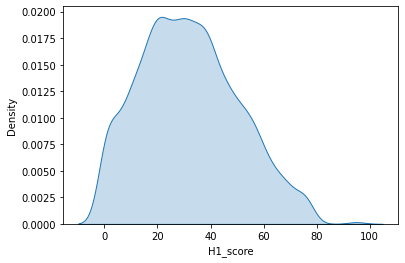

In [ ]:
n1m = n1[n1['H1']==1]
sns.kdeplot(data=n1m['H1_score'], shade=True)

In [ ]:
n1m['H1_score'].median()

31.0

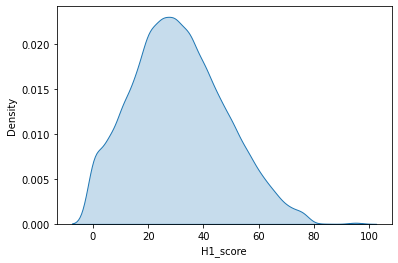

In [ ]:
n1f = n1[n1['H1']==2]
sns.kdeplot(data=n1f['H1_score'], shade=True)

In [ ]:
n1f['H1_score'].median()

30.0

In [ ]:
# conclusion - slight difference but yes true

In [ ]:
# H2 - Q - 1,9,15,25,27,31
# In a partnership (romantic or non romantic), males are more expressive (less hesitant) than females.

In [ ]:
n1['H2_score'] = 0
mt = 0
ft = 0
ms = 0
fs = 0

for i in range(len(n1)):
  if n1['gender'][i] == 1:
    ms = ms + 1
    n1['H2_score'][i] = n1['Q1'][i] + n1['Q9'][i] + (5-n1['Q15'][i]) + (5-n1['Q25'][i]) + (5-n1['Q27'][i]) + (5-n1['Q31'][i])
    mt = mt + n1['H2_score'][i]
  elif n1['gender'][i] == 2:
    fs = fs + 1
    n1['H2_score'][i] = n1['Q1'][i] + n1['Q9'][i] + (5-n1['Q15'][i]) + (5-n1['Q25'][i]) + (5-n1['Q27'][i]) + (5-n1['Q31'][i])
    ft = ft + n1['H2_score'][i]

print(mt,ft)
mt = mt/ms
ft = ft/fs
print('Avg score : ',mt,ft)